This homework will explore another application of the SVD: image watermarking. Suppose that you are a photographer making a living off your camera. You publish a photo online, only to find it was copied without crediting you! How can you prove someone took it without authorization? In this section, we will used SVD to embed a secure, invisible watermark in images. We will be following the method in [[Moulik et al., 2016]](https://pdfs.semanticscholar.org/de24/ece64ffefa3aacab30a4c08184af0ef251dc.pdf), Section 2.

The basic idea is as follows:
1. Compute the SVD of the original image and the watermark;<br><br>
1. Embed part of the SVD of the watermark in the matrix of singular values of the original image;<br><br>
1. Use this embedding to compute a new image using the $u$ and $v^T$ matrices from the original image. This image will  hopefully be visually indistinguishable from the original!

We will then show how to check if an image has the watermark embedded using the rest of the SVD of the watermark. By doing so, we can detect fraud: we can keep the watermark's SVD secret, preventing anyone who doesn't have it from either being able to embed the watermark or check if it's there.

> ## Make a copy of this notebook (File menu -> Make a Copy...)

### Homework Question 1: Embedding the Watermark


First, open the puppy's image file (*data/puppy.bmp*) into an array *P* and the watermark file *data/watermark.bmp* in an array *W*. Display both below. Then compute their SVDs $P = U_pS_pV_p^T$ and $W = U_wS_wV_w^T$. We will embed $U_wS_w$ into $S_p$, then create a new image by using this new matrix instead of $S_p$:
  * Compute a new matrix $S_1 = S_p + \alpha U_wS_w$, where $\alpha = 0.001$. Note that since we're only adding a very small multiple of $U_wS_w$ to $S_p$, so $S_1$ is still pretty close to being diagonal!<br><br>
  * Now compute $P_w = U_p S_1 V_p^T$ and display the image side-by-side with the original image of the puppy. If you did the above steps correctly, you should notice very little difference! Explain why this is the case, and why the new image has the watermark embedded in it!

<IPython.core.display.Javascript object>


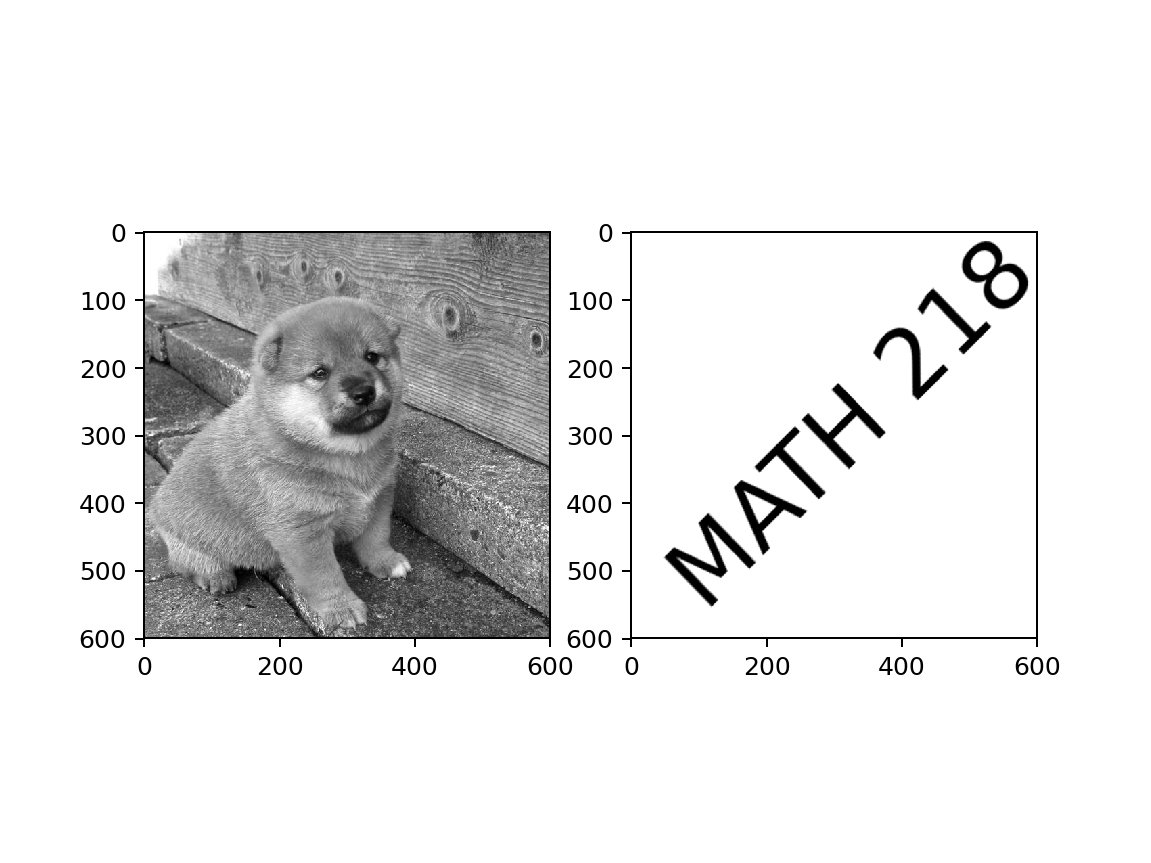

In [3]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
fig, ax = plt.subplots(1,2)

P=plt.imread('data/puppy.bmp')
W=plt.imread('data/watermark.bmp')

ax[0].imshow(P,cmap='gray')
ax[1].imshow(W,cmap='gray')

<IPython.core.display.Javascript object>


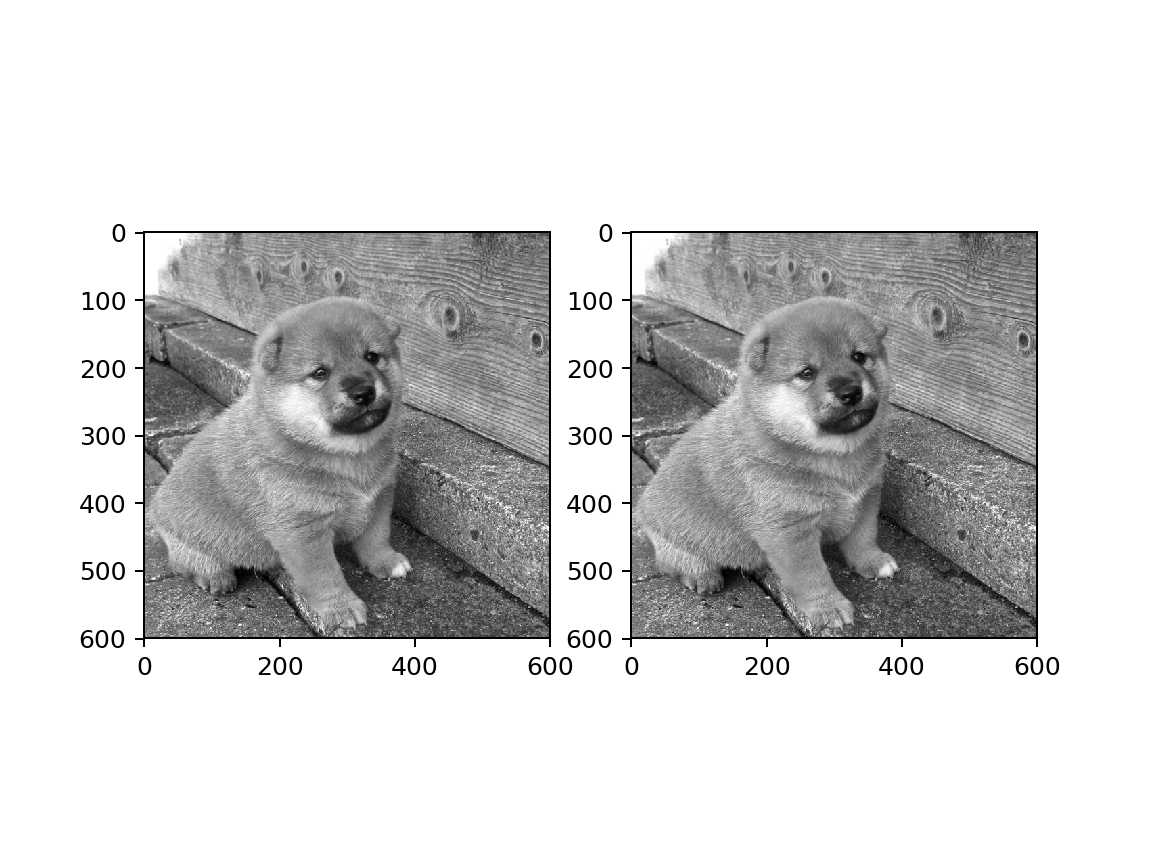

(600, 600)


In [23]:
Up,Sp,VpT = np.linalg.svd(P)
Sp = np.diag(Sp)

Uw,Sw,VwT = np.linalg.svd(W)
Sw = np.diag(Sw)

S1 = Sp + 0.001*(Uw@Sw)
Pw=Up@S1@VpT

%matplotlib notebook
fig, ax = plt.subplots(1,2)
ax[0].imshow(P,cmap='gray')
ax[1].imshow(Pw,cmap='gray')

Since we're adding a very small multiple $U_wS_w$ to $S_p$, $S_1$ is close to the diagonal enough that the image of $P_w = U_p S_1 V_p^T$ looks like the original image. However, the new image has the watermark embedded since it uses $S_1$, and $S_1$ is produced partly from the left singular vectors and singular values of W. From these two, we can figure out the right singular vectors, which gives us all the information needed to produce the watermark, W.

### Homework Question 2: Recovering the Watermark

Suppose that $P$ is the original puppy image and $P_w$ is the puppy with the embedded watermark as computed above. Recall that $P_w = U_pS_1V^T_p$, where $S_1 = S_p + \alpha U_wS_w$. Substitute these definitions in to show that 

$$\frac1\alpha\left(U_p^T(P_w - P)V_p\right) = U_wS_w$$

(Recall that in the SVD $A=USV^T$, $U$ and $V$ are orthogonal matrices!)

With the matrices you created in Homework Question 1, compute the left hand side of the above expression. Then multiply it by $V^T_w$ and display the result as an image. Explain what just happened.

$P_w = U_pS_1V^T_p$ <br>
$S_1 = S_p + \alpha U_wS_w$ <br>
$P_w = U_p(S_p + \alpha U_wS_w)V^T_p$ <br>
$P_w = U_pS_pV^T_p + \alpha U_pU_wS_wV^T_p$ <br>
$P_w - U_pS_pV^T_p = \alpha U_pU_wS_wV^T_p$ <br>
$P_w - P = \alpha U_pU_wS_wV^T_p$ <br>
$(P_w - P)V_p = \alpha U_pU_wS_wV^{-1}_pV_p$ <br>
$(P_w - P)V_p = \alpha U_pU_wS_w$ <br>
$\frac1\alpha(P_w - P)V_p = \frac1\alpha\alpha U_pU_wS_w$ <br>
$\frac1\alpha(P_w - P)V_p = U_pU_wS_w$ <br>
$\frac1\alpha(U^{-1}_p(P_w - P)V_p) = U^{-1}_pU_pU_wS_w$ <br>
$\frac1\alpha(U^{-1}_p(P_w - P)V_p) = U_wS_w$ <br>
$\frac1\alpha(U^T_p(P_w - P)V_p) = U_wS_w$ <br>

***WHAT HAPPENED?*** We recovered the original watermark image. In other words, given $P_w$ and $S_1$, we can recover $U_wS_w$ through arithmetic manipulation, and since we know $V^T_w$, the $U_wS_wV^T_w = W$, the original watermark.

<IPython.core.display.Javascript object>


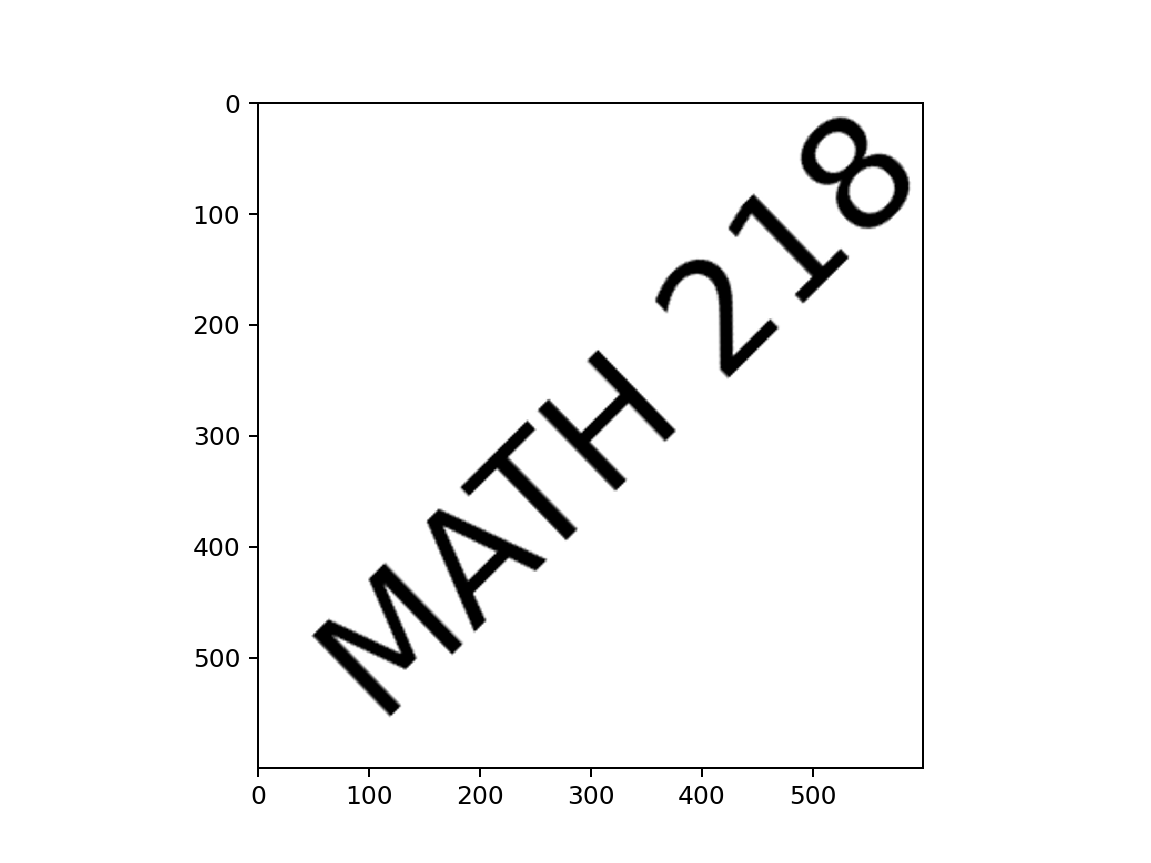

In [5]:
left = (1/0.001)*(Up.T@(Pw-P)@VpT.T)
product = left@VwT

%matplotlib notebook
plt.imshow(product,cmap='gray')

### Homework Question 3: THIEF, THIEF!

Lastly, we will check that this watermark secures the image.

Display the image with the invisible watermark. Make sure you're displaying 600 by 600 pixels as follows:

```python
dpi = 60.0
xpixels, ypixels = 600, 600

fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
fig.figimage(img)
plt.show()
```

Then take a screenshot of it (**YOU THIEF!**). Try to cover up your tracks by opening the screenshot in your favorite image editing program: crop it and/or resize it to $600\times 600$ to match the original. Save it as a grayscale image in bmp format.

(Note: grayscale is important here. You don't just want it to be a color image format of an image that happens to be gray.)

Open your stolen image into an array $SI$. Check its *shape*. If it's anything but *(600,600)*, you did something wrong above. Then repeat your computation from the left hand of the equation in Homework Question 2, replacing $P_w$ with $SI$. Display your result. What can you say? Explain how this procedure secures images.

<IPython.core.display.Javascript object>


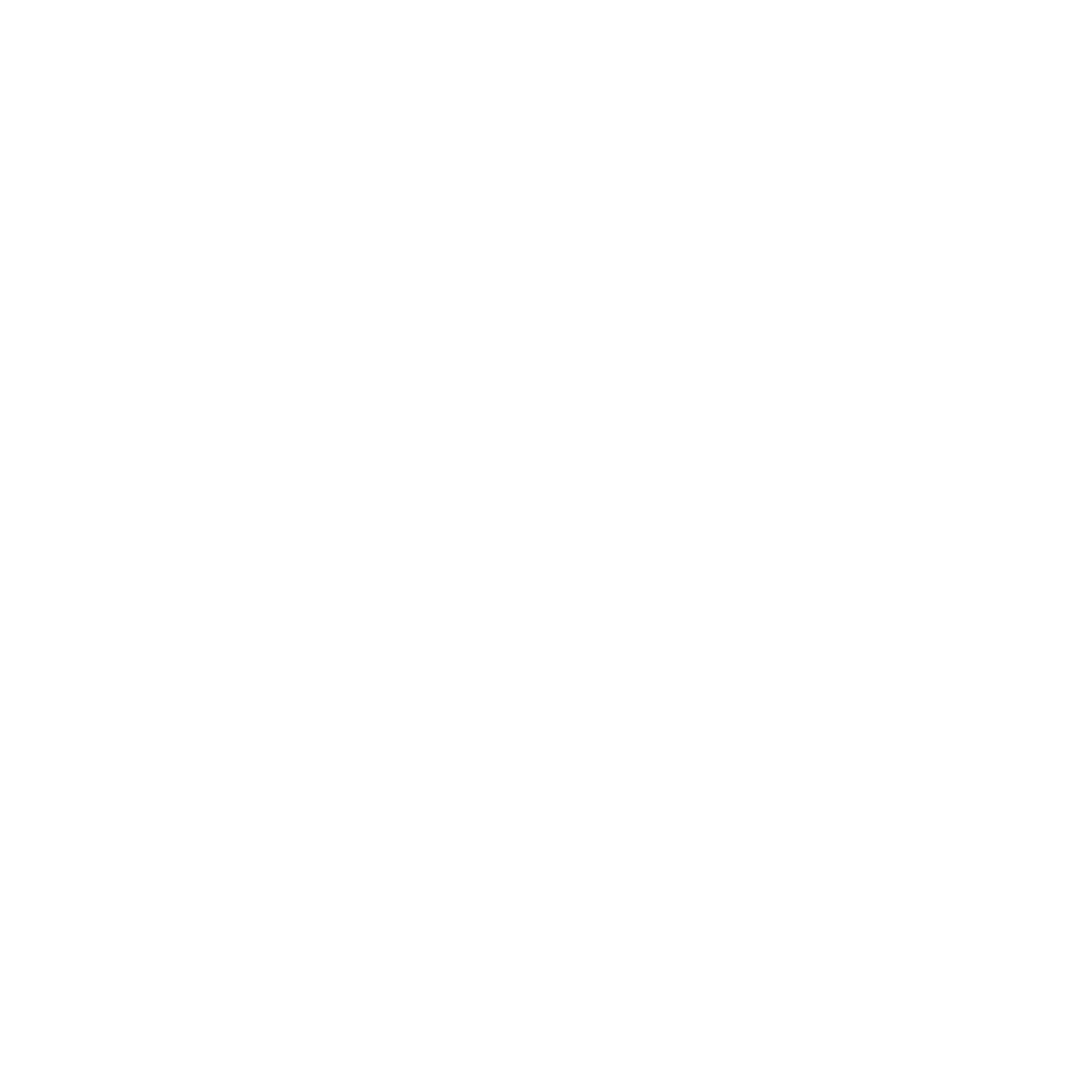

(600, 600)


<IPython.core.display.Javascript object>


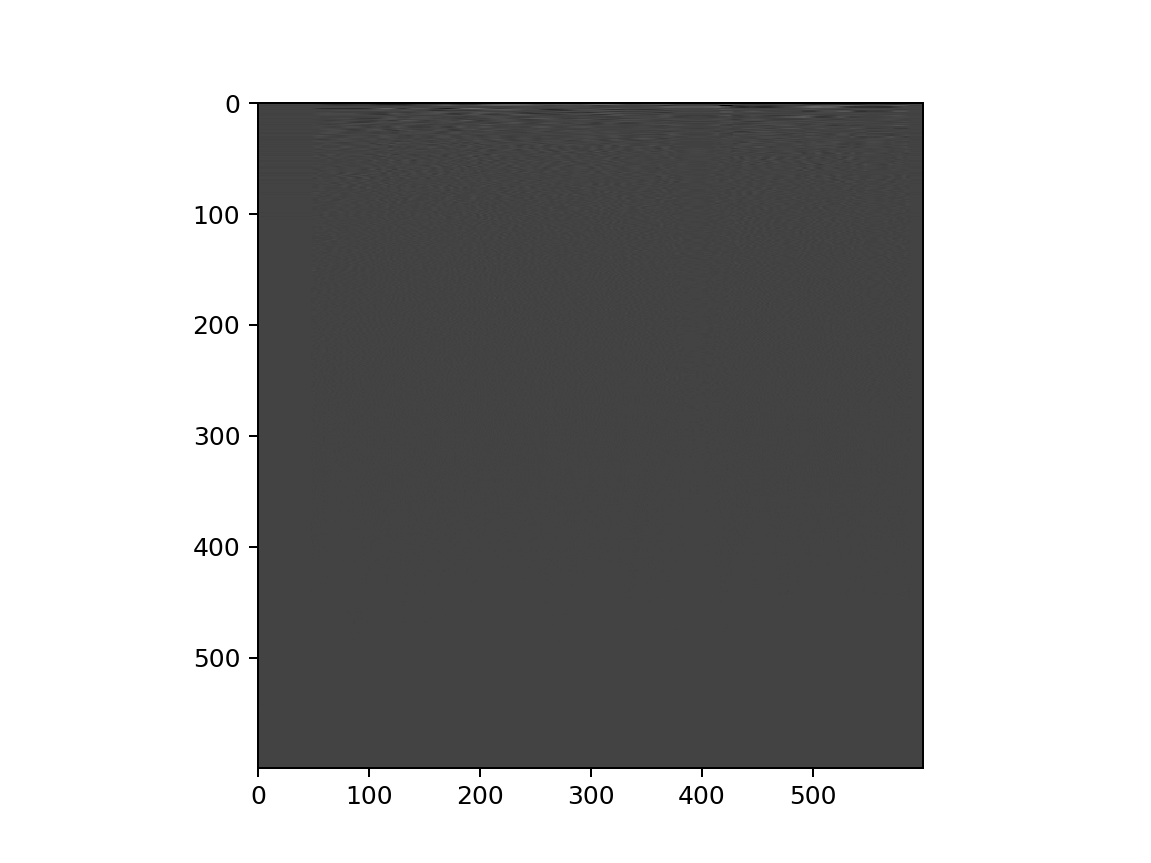

In [41]:
import matplotlib.image as mpimg

dpi = 60.0
xpixels, ypixels = 600, 600

fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
#F=plt.imread('formatted_pup.png')


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

SI = mpimg.imread('formatted_pup.bmp')     
graySI = rgb2gray(img)  

plt.imshow(graySI)
print(graySI.shape)

#from question 2
left = (1/0.001)*(Up.T@(graySI-P)@VpT.T)
product = left@VwT

%matplotlib notebook
plt.imshow(product,cmap='gray')

### Question 3###

After "stealing" the original image with the watermark, performing the computation from Question 2 and printing out our results, we did not get back the original watermark. This happened because the only way the computation from Question 2 will yield the watermark is if you use the original image embedded with the watermark in the computation. If you screenshot (steal) an image, the watermark is lost. Thus, if you can reverse engineer the watermark via this mathematrical computation then the image was not stolen. If you cannot, the reverse is true. 

The watermark is lost is because the computer does not have the physical capability to display the extremely small differences in the pixel values between the watermarked image and the non-watermarked image. Even with extremely sophicated technology and the world's best image thieves, you would never be able to recover the *original* watermark from a screenshot–you *might* be able to recover a partial watermark, but this is still evidence the image was stolen which makes this technique extremely secure. This relates back to question 10.4 of the lab which demonstrates that it's possible to recreate an image that is similar to the original, but impossible to recreate an exact copy. 

This procedure secures images because you can verify if an image was stolen or not. It's particularly useful because the thief is not able to detect if there is a watermark or not. Likewise, it's very difficult to forge a watermark, making it extremely difficult for someone to impersonate your work. In this sense, the watermark can help to prevent counterfeiting. 